In [17]:
import pandas as pd
import numpy as np
reports_df = pd.read_csv("data.csv")
reports_df.head()

#'''overview of the data'''

,X-RAY NUMBER,VARIABLES,RESULT
0,198226,Chest\nThe cardiac shadow is normal in outline...,Negative
1,197016,Chest\nThe cardiac shadow is preserved with a ...,Negative
2,199403,"Chest\nRotated radiograph.\nWithin this limit,...",Negative
3,199523,Chest\nRotated radiograph.\nThere is cardiac e...,Positive
4,199182,"Chest\nRotated radiograph.\nWithin this limit,...",Negative


In [3]:
reports_df['RESULT'].unique()

#'''listing unique classes'''

array(['Negative', 'Positive', 'Indeterminate'], dtype=object)

In [4]:
reports_filtered_df = reports_df[pd.notnull(reports_df['VARIABLES'])]
reports_filtered_df.info()

#'''''''''''''overview of the input dataset after removing null rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 3 columns):
X-RAY NUMBER    400 non-null int64
VARIABLES       400 non-null object
RESULT          400 non-null object
dtypes: int64(1), object(2)
memory usage: 12.5+ KB


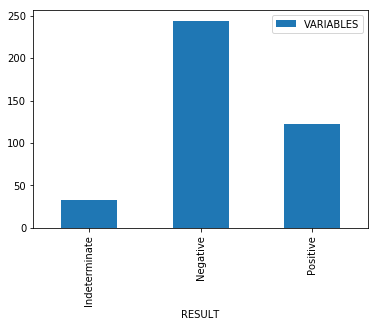

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
df = reports_filtered_df[['RESULT', 'VARIABLES']]
df.groupby('RESULT').count().plot.bar(ylim=0)
plt.show()

#'''distirbution of classes in the dataset'''

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

labels = df['RESULT']
text = df['VARIABLES']

X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.3)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_labels_trf = labels.transform(y_train)

print(labels.classes_)

#'''preprocessing input data'''

['Indeterminate' 'Negative' 'Positive']


In [24]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

linearsvc = LinearSVC()
clf = linearsvc.fit(X_train_transformed, y_train_labels_trf)

calibrated_svc = CalibratedClassifierCV(base_estimator = linearsvc, cv = "prefit")

calibrated_svc.fit(X_train_transformed, y_train_labels_trf)
predicted = calibrated_svc.predict(X_test_transformed)

to_predict = ["VARIABLES"]
p_count = count_vect.transform(to_predict)
p_tfidf = tf_transformer.transform(p_count)

print('Average accuracy on test set = {}'. format(np.mean(predicted == labels.transform(y_test))))
print('Predicted probabilities of demo input string are')
print(calibrated_svc.predict_proba(p_tfidf))


#'''''''''''''''Training using classifier'''''''''''

pd.DataFrame(calibrated_svc.predict_proba(p_tfidf)*100, columns = labels.classes_)

#'''''''''''''Prediction''''''''''''''''

Average accuracy on test set = 0.9083333333333333
Predicted probabilities of demo input string are
[[0.13632794 0.39022159 0.47345048]]


,Indeterminate,Negative,Positive
0,13.632794,39.022159,47.345048


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 3 columns):
X-RAY NUMBER    400 non-null int64
VARIABLES       400 non-null object
RESULT          400 non-null object
dtypes: int64(1), object(2)
memory usage: 12.5+ KB


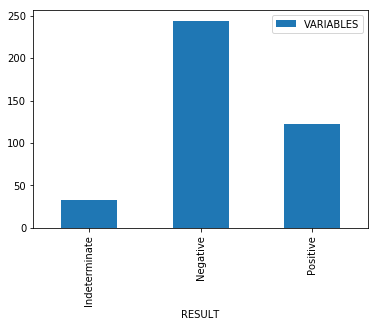

,tfidf
surrounding,0.451287
shadow,0.415594
outline,0.304582
normal,0.211760
shape,0.199129
and,0.197146
is,0.195746
the,0.194356
free,0.184775
focal,0.160005


In [22]:

# coding: utf-8

import pandas as pd
import numpy as np
import seaborn as sns
reports_df = pd.read_csv("data.csv")
#reports_df.head()

#'''overview of the data'''

reports_df['RESULT'].unique()

#'''listing unique classes'''

reports_filtered_df = reports_df[pd.notnull(reports_df['VARIABLES'])]
reports_filtered_df.info()

#'''''''''''''overview of the input dataset after removing null rows

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,6))
df = reports_filtered_df[['RESULT', 'VARIABLES']]
df.groupby('RESULT').count().plot.bar(ylim=0)
plt.show()

#'''distirbution of classes in the dataset'''


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

labels = df['RESULT']
text = df['VARIABLES']

X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.3)

count_vect = TfidfVectorizer()
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)


#print(count_vect.get_feature_names())
#print(X_train_counts.toarray())
#print(X_train_counts.shape)

tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X_train_counts)

# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index = count_vect.get_feature_names(),columns=["tf_idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['tf_idf_weights'])

# count matrix
count_vector = count_vect.transform(text)
 
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

feature_names = count_vect.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)